#### BACKTESTING PORTFOLIO OF STRATEGIES 

In [1]:
import os 
import numpy as np 
import pandas as pd 

path = 'strat_returns/Testing/'

In [2]:
### FILES 
files = os.listdir(path)
#files.reverse()
print(files)
spy_idx = files.index('SPY.csv')

### COLUMNS 
cols = [ 'daily_ret', 'half_kelly']

weights = { #0.964
    'SPY' : 0.5,
    'XLU' : 0.15,
    'AMLP' : 0.087,
    'USO' : 0.087,
    'XLI' : 0.17
}

['AMLP.csv', 'IVE.csv', 'IVW.csv', 'IWM.csv', 'SPY.csv', 'XLF.csv', 'XLI.csv', 'XLU.csv', 'XLV.csv']


In [3]:
## DF 
df = pd.read_csv( path + files.pop(spy_idx), index_col= 'Unnamed: 0')
#df = df[cols]
df['ticker'] = 'SPY'
df.tail(20)

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
2024-12-24,1,1.0,33160100.0,16175.0,0.00,2431576.66,0.000000,4.0,SPY
2024-12-26,2,1.0,41219100.0,16174.0,0.00,2431576.66,0.000000,4.0,SPY
2024-12-27,2,1.0,64969300.0,16346.0,0.00,2431576.66,0.000000,4.0,SPY
2024-12-30,2,2.0,56578800.0,16535.0,38523.55,2470100.21,0.015843,4.0,SPY
2024-12-31,2,2.0,57052700.0,16858.0,39276.14,2509376.35,0.015901,4.0,SPY
2025-01-02,0,2.0,50204000.0,17168.0,39998.44,2549374.79,0.015940,4.0,SPY
2025-01-03,1,1.0,37888500.0,17226.0,0.00,2549374.79,0.000000,4.0,SPY
2025-01-06,2,1.0,47679400.0,17128.0,0.00,2549374.79,0.000000,4.0,SPY
2025-01-07,0,1.0,60393100.0,17324.0,0.00,2549374.79,0.000000,4.0,SPY
2025-01-08,2,2.0,47304700.0,17298.0,40301.34,2589676.13,0.015808,4.0,SPY


In [4]:

for file in files: 
    
    df_file = pd.read_csv(f"strat_returns/Testing/{file}", index_col='Unnamed: 0') 
    
    #df_file = df_file[cols]
    df_file['ticker'] = file.replace('.csv', '')
    df = pd.concat([df, df_file], axis = 0 )

In [5]:
df.head()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
2006-01-03,1,1.0,73256700.0,244.0,0.0,10000.0,0.0,2.165,SPY
2006-01-04,1,1.0,51899600.0,243.0,0.0,10000.0,0.0,2.165,SPY
2006-01-05,2,1.0,47307500.0,243.0,0.0,10000.0,0.0,2.165,SPY
2006-01-06,1,1.0,62885900.0,241.0,0.0,10000.0,0.0,2.165,SPY
2006-01-09,2,1.0,43527400.0,444.0,0.0,10000.0,0.0,4.000,SPY


In [6]:
df = df.dropna()
df = df.reset_index()
df['index'] = pd.to_datetime(df['index'])
#df = df[df['daily_ret'] != 0] #### removes symbols from the data which do not trade on that day 

df = df.sort_values(by = ['index', 'half_kelly'], ascending=[True, False], axis = 0) 
df = df.set_index('index')
df.tail()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
index,,,,,,,,,
2025-01-24,1,1.0,8127400.0,5183174.0,0.00,1.869960e+08,0.000000,4.00,XLV
2025-01-24,2,1.0,19061300.0,336726.0,0.00,2.139056e+07,0.000000,3.60,IWM
2025-01-24,1,0.0,6457700.0,2502.0,0.00,1.534684e+05,0.000000,2.30,XLI
2025-01-24,2,2.0,1186100.0,37779842.0,6422570.14,1.171115e+09,0.005514,1.69,AMLP
2025-01-24,1,1.0,8384800.0,98677.0,0.00,1.074506e+07,0.000000,0.73,XLU


In [7]:
### TOP HK VALUES 

import holidays
us_holidays = holidays.US()

date_range =  pd.date_range(start=df.index.min(), end=df.index.max())
date_range = [date for date in date_range if date not in us_holidays]
    

In [8]:
traded_tickers = df.groupby(level=0)['half_kelly'].count().to_frame()
traded_tickers.columns = ['n_tickers']
traded_tickers.n_tickers.value_counts()

n_tickers
9    3181
8    1615
5     904
1     100
Name: count, dtype: int64

In [ ]:
#df.merge(traded_tickers, left_index=True, right_index = True)

In [ ]:
df.head()

In [9]:
##### EXPERIMENTAL CELL #######

#### FILTERING FOR HALF KELLY > 1 
df2 = df[df['half_kelly'] >= 1]
#traded_tickers = df2.groupby(level=0)['half_kelly'].count().to_frame()
#traded_tickers.columns = ['n_tickers']

### 1 / N PORTFOLIO 
traded_tickers['weights'] = 1 / traded_tickers['n_tickers'] 

df2 = df2.merge(traded_tickers, left_index=True, right_index = True)

df2['levered_w'] = df2['weights'] * df2['half_kelly']
df2['return'] = df2['daily_ret'] * df2['levered_w']
df2.tail()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker,n_tickers,weights,levered_w,return
index,,,,,,,,,,,,,
2025-01-24,1,2.0,39084000.0,1343155.0,-429812.60,1.664505e+07,-0.025172,4.00,XLF,9,0.111111,0.444444,-0.011188
2025-01-24,1,1.0,8127400.0,5183174.0,0.00,1.869960e+08,0.000000,4.00,XLV,9,0.111111,0.444444,0.000000
2025-01-24,2,1.0,19061300.0,336726.0,0.00,2.139056e+07,0.000000,3.60,IWM,9,0.111111,0.400000,0.000000
2025-01-24,1,0.0,6457700.0,2502.0,0.00,1.534684e+05,0.000000,2.30,XLI,9,0.111111,0.255556,0.000000
2025-01-24,2,2.0,1186100.0,37779842.0,6422570.14,1.171115e+09,0.005514,1.69,AMLP,9,0.111111,0.187778,0.001035


In [17]:
df2[df2['n_tickers'] == 1]

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker,n_tickers,weights,levered_w,return
index,,,,,,,,,,,,,
2002-01-08,0,2.0,92000.0,1208.0,190.28,10190.28,0.019028,4.0,IVE,1,1.0,4.0,0.076112
2002-01-09,0,2.0,99800.0,1238.0,195.08,10385.36,0.019144,4.0,IVE,1,1.0,4.0,0.076575
2002-01-10,2,2.0,64500.0,1260.0,9.60,10394.96,0.000924,4.0,IVE,1,1.0,4.0,0.003698
2002-01-11,0,2.0,58200.0,1277.0,201.32,10596.28,0.019367,4.0,IVE,1,1.0,4.0,0.077468
2002-01-14,2,2.0,100300.0,1314.0,194.10,10790.38,0.018318,4.0,IVE,1,1.0,4.0,0.073271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-05-24,0,1.0,236000.0,1726.0,0.00,13855.39,0.000000,4.0,IVE,1,1.0,4.0,0.000000
2002-05-28,0,2.0,157500.0,1736.0,257.40,14112.79,0.018578,4.0,IVE,1,1.0,4.0,0.074310
2002-05-29,2,2.0,88900.0,1779.0,263.85,14376.64,0.018696,4.0,IVE,1,1.0,4.0,0.074783


In [ ]:
#### FILTERING FOR HALF KELLY > 1 
df2 = df[df['half_kelly'] >= 1]
traded_tickers = df2.groupby(level=0)['half_kelly'].count().to_frame()
traded_tickers.columns = ['n_tickers']

### 1 / N PORTFOLIO 
traded_tickers['weights'] = 1 / traded_tickers['n_tickers'] 

df2 = df2.merge(traded_tickers, left_index=True, right_index = True)

df2['levered_w'] = df2['weights'] * df2['half_kelly']
df2['return'] = df2['daily_ret'] * df2['weights']
df2.tail()

In [10]:
df_daily = df2.groupby(level = 0)['return'].sum().to_frame()
df_daily['cum_ret'] = df_daily['return'].cumsum()
df_daily['capital'] = 6e4
df_daily['daily_pnl'] = df_daily['capital'] * df_daily['cum_ret']

#df_daily = df_daily[df_daily.index <= '2016-01-01']

df_daily.head()

,return,cum_ret,capital,daily_pnl
index,,,,
2002-01-08,0.076112,0.076112,60000.0,4566.720000
2002-01-09,0.076575,0.152687,60000.0,9161.215931
2002-01-10,0.003698,0.156384,60000.0,9383.066691
2002-01-11,0.077468,0.233853,60000.0,14031.165385
2002-01-14,0.073271,0.307124,60000.0,18427.425204


Text(0, 0.5, 'Cumulative Return')

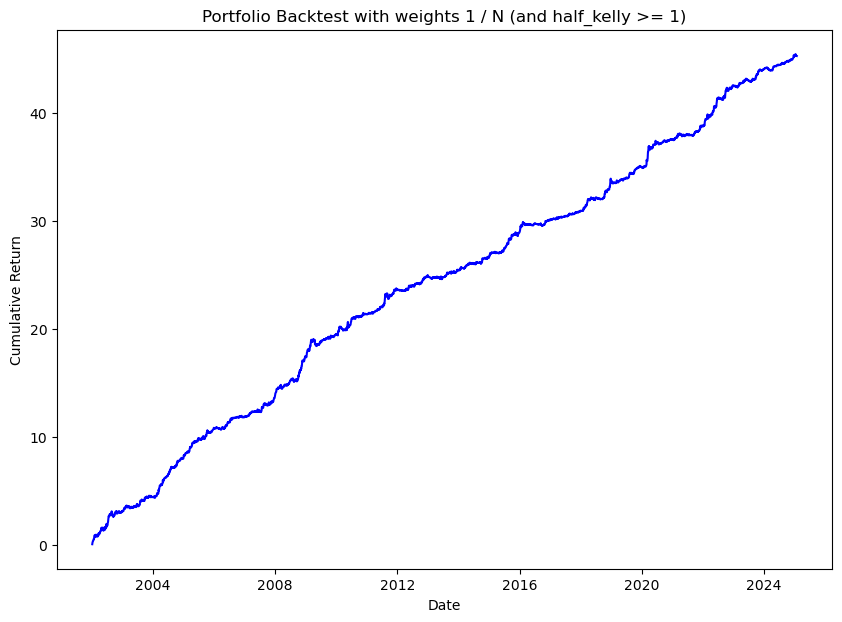

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize= [10,7])
plt.plot(df_daily.index, df_daily['cum_ret'], color = 'b')
plt.title('Portfolio Backtest with weights 1 / N (and half_kelly >= 1)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

In [12]:
#####################################################################
 # PERFORMANCE EVALUATION 
#####################################################################

#####   MAX DRAWDOWN
from calculateMaxDD import calculateMaxDD

cum_ret = np.cumprod(1+ df_daily['return']) - 1
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cum_ret.values)

#####   SHARPE RATIO
sharpe_ratio = round(np.sqrt(252) * np.mean(df_daily['return']) / np.std(df_daily['return']),2)

#####   AVG YEARLY RETURN AND STD
mean_ret = df_daily['return'].mean() * 252
std = df_daily['return'].std()*np.sqrt(252)

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Maximum Drawdown: {round(maxDrawdown,4)}')
print(f'Max Drawdown Duration: {maxDrawdownDuration} days' )
print(f'Start day Drawdown: {startDrawdownDay}')
print(f"Average Yearly Return: {round(mean_ret*100, 2)} %")

Sharpe Ratio: 3.0
Maximum Drawdown: -0.5184
Max Drawdown Duration: 184.0 days
Start day Drawdown: 1846
Average Yearly Return: 196.75 %


Text(0, 0.5, 'HK')

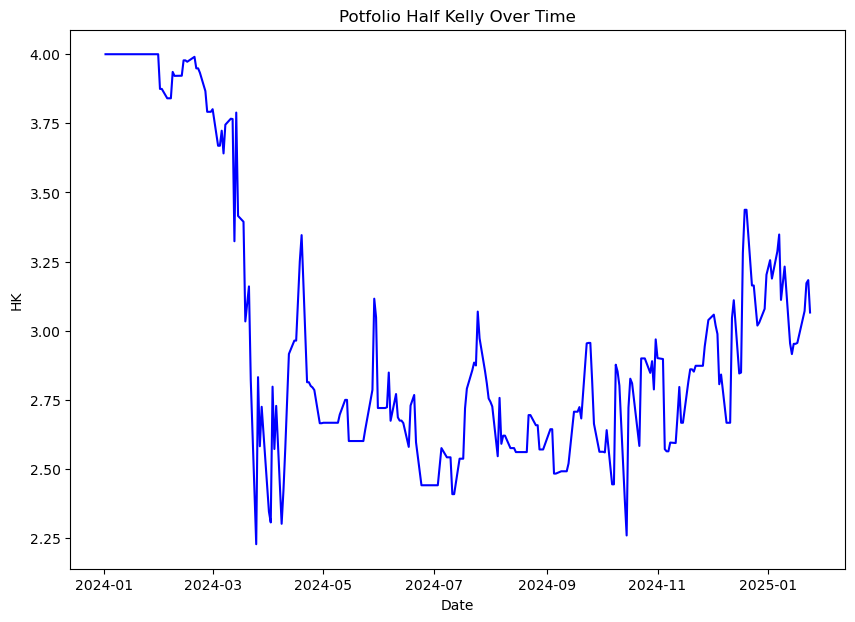

In [13]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

In [14]:
df_daily['month'] = df_daily.index.month
df_daily.groupby('month')['return'].mean() * 30

month
1     0.323485
2     0.225282
3     0.245503
4     0.176483
5     0.153484
6     0.283429
7     0.209744
8     0.222260
9     0.183421
10    0.288695
11    0.223680
12    0.270868
Name: return, dtype: float64

In [15]:
df_daily['year'] = df_daily.index.year
monthly_pnl = df_daily.groupby(['year', 'month'])['return'].sum().to_frame()
monthly_pnl.tail(50)

return
year month          
2020 12     0.056381
2021 1      0.085203
     2      0.234887
     3      0.155946
     4     -0.150826
     5      0.026414
     6      0.049966
     7     -0.010210
     8     -0.045067
     9      0.344102
     10     0.020088
     11     0.397630
     12     0.079610
2022 1      0.651742
     2      0.180779
     3      0.146967
     4      0.423166
     5      0.339857
     6      0.897892
     7     -0.108218
     8      0.187598
     9      0.636519
     10    -0.043430
     11     0.147905
     12     0.263567
2023 1     -0.073702
     2      0.169262
     3      0.192626
     4      0.062344
     5      0.337518
     6     -0.190767
     7     -0.042419
     8      0.148961
     9      0.371873
     10     0.461462
     11     0.013998
     12     0.115835
2024 1      0.140343
     2     -0.181698
     3     -0.041887
     4      0.339944
     5      0.109395
     6      0.046048
     7      0.146852
     8     -0.025543
     9      0.202374
     10     0.105199
     11     0.040106
     12     0.410130
2025 1     -0.059050

In [16]:
yearly_pnl = df_daily.groupby(['year'])['return'].sum().to_frame()
yearly_pnl.tail(50)

,return
year,
2002,3.126217
2003,1.313711
2004,3.587465
2005,2.825789
2006,0.993714
2007,1.966447
2008,3.648603
2009,2.087176
2010,1.825612


### NEXT: USE THE WEIGHTS CURRENTLY IN USE!

In [ ]:
### DISCRETIONARY WEIGHTS 
df2['weights'] = df2['ticker'].map(weights)
df2 = df2.dropna()

df2.head()

In [ ]:
df_daily = df2.groupby(level = 0)['return'].sum().to_frame()
df_daily['cum_ret'] = df_daily['return'].cumsum()
df_daily['capital'] = 6e4
df_daily['eod_capital'] = df_daily['capital'] * df_daily['cum_ret']

#df_daily = df_daily[df_daily.index <= '2016-01-01']

df_daily.head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= [10,7])
plt.plot(df_daily.index, df_daily['cum_ret'], color = 'b')
plt.title('Portfolio Backtest with weights 1 / N (and half_kelly >= 1)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

In [ ]:
#####################################################################
 # PERFORMANCE EVALUATION 
#####################################################################

#####   MAX DRAWDOWN
from calculateMaxDD import calculateMaxDD

cum_ret = np.cumprod(1+ df_daily['return']) - 1
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cum_ret.values)

#####   SHARPE RATIO
sharpe_ratio = round(np.sqrt(252) * np.mean(df_daily['return']) / np.std(df_daily['return']),2)

#####   AVG YEARLY RETURN AND STD
mean_ret = df_daily['return'].mean() * 252
std = df_daily['return'].std()*np.sqrt(252)

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Maximum Drawdown: {round(maxDrawdown,4)}')
print(f'Max Drawdown Duration: {maxDrawdownDuration} days' )
print(f'Start day Drawdown: {startDrawdownDay}')
print(f"Average Yearly Return: {round(mean_ret*100, 2)} %")

In [ ]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
#hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

In [ ]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
#hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
#plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.hist(hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

In [ ]:
df_daily['year'] = df_daily.index.year
df_daily.groupby('year')['return'].cumsum()

In [ ]:
df_daily[df_daily['year'] == 2024]['return'].sum()